# **Music Artist Recommendation Engine**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Task 1

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Kmeans/music.csv")
df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [ ]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Top Genre'] = labelencoder.fit_transform(df['Top Genre'])
df['Year'] = labelencoder.fit_transform(df['Year'])
df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,2,47,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,5,43,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,8,44,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,9,50,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,61,45,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,2,1,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,2,1,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,34,2,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,28,2,174,26,45,-13,7,60,324,54,4,65


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Top Genre','Year'])
print(one_hot_encoded_data)

      Index                   Title  ... Year_61  Year_62
0         1                 Sunrise  ...       0        0
1         2             Black Night  ...       0        0
2         3          Clint Eastwood  ...       0        0
3         4           The Pretender  ...       0        0
4         5  Waitin' On A Sunny Day  ...       0        0
...     ...                     ...  ...     ...      ...
1989   1990        Heartbreak Hotel  ...       0        0
1990   1991               Hound Dog  ...       0        0
1991   1992         Johnny B. Goode  ...       0        0
1992   1993               Take Five  ...       0        0
1993   1994          Blueberry Hill  ...       0        0

[1994 rows x 225 columns]


In [ ]:
import numpy as np
num_df = df.select_dtypes(np.number)
num_df.head()

,Index,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,2,47,157,30,53,-14,11,68,201,94,3,71
1,2,5,43,135,79,50,-11,17,81,207,17,7,39
2,3,8,44,168,69,66,-9,7,52,341,2,17,69
3,4,9,50,173,96,43,-4,3,37,269,0,4,76
4,5,61,45,106,82,58,-5,10,87,256,1,3,59


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

scale_columns = num_df.columns.tolist()
num_df[scale_columns] = min_max_scaler.fit_transform(num_df[scale_columns])

num_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Index,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,0.000000,0.013514,0.758065,0.710059,0.278351,0.500000,0.52,0.092784,0.677083,0.081880,0.949495,0.018868,0.674157
1,0.000502,0.033784,0.693548,0.579882,0.783505,0.465116,0.64,0.154639,0.812500,0.086429,0.171717,0.094340,0.314607
2,0.001004,0.054054,0.709677,0.775148,0.680412,0.651163,0.72,0.051546,0.510417,0.188021,0.020202,0.283019,0.651685
3,0.001505,0.060811,0.806452,0.804734,0.958763,0.383721,0.92,0.010309,0.354167,0.133434,0.000000,0.037736,0.730337
4,0.002007,0.412162,0.725806,0.408284,0.814433,0.558140,0.88,0.082474,0.875000,0.123578,0.010101,0.018868,0.539326


Task 2

# **Kmeans Clustering**

In [ ]:
from sklearn.cluster import KMeans

df_1 = num_df[['Energy','Popularity']]
kmeans = KMeans(n_clusters=3,n_init=3).fit(df_3)
centroids = kmeans.cluster_centers_
print(centroids)

print("Attributes used for cluster model: {},{}".format('Sales_in_thousands','Price_in_thousands'))

[[0.65160087 0.36137755]
 [0.34202298 0.56377786]
 [0.77168296 0.64510433]]
Attributes used for cluster model: Sales_in_thousands,Price_in_thousands


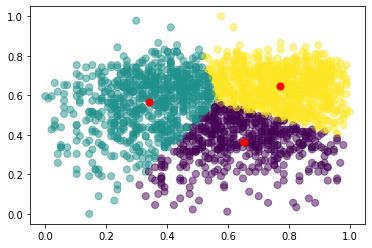

In [ ]:
plt.scatter(df_1['Energy'], df_1['Popularity'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# **HDBSCAN clustering**

In [ ]:
!pip install hdbscan

import hdbscan

     |████████████████████████████████| 6.4 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311934 sha256=1eb65bdfa633c4855dda31e8a6ada3ba45e597ef99c120e53a19e1335c086fc9
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [ ]:
num_df_1 = num_df.head(1000)
num_df_1

,Index,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,0.000000,0.013514,0.758065,0.710059,0.278351,0.500000,0.52,0.092784,0.677083,0.081880,0.949495,0.018868,0.674157
1,0.000502,0.033784,0.693548,0.579882,0.783505,0.465116,0.64,0.154639,0.812500,0.086429,0.171717,0.094340,0.314607
2,0.001004,0.054054,0.709677,0.775148,0.680412,0.651163,0.72,0.051546,0.510417,0.188021,0.020202,0.283019,0.651685
3,0.001505,0.060811,0.806452,0.804734,0.958763,0.383721,0.92,0.010309,0.354167,0.133434,0.000000,0.037736,0.730337
4,0.002007,0.412162,0.725806,0.408284,0.814433,0.558140,0.88,0.082474,0.875000,0.123578,0.010101,0.018868,0.539326
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.499247,0.033784,0.290323,0.550296,0.721649,0.697674,0.76,0.082474,0.635417,0.113723,0.434343,0.018868,0.617978
996,0.499749,0.412162,0.290323,0.402367,0.268041,0.418605,0.68,0.164948,0.239583,0.078848,0.828283,0.018868,0.359551
997,0.500251,0.033784,0.290323,0.520710,0.752577,0.860465,0.88,0.010309,0.593750,0.119788,0.060606,0.132075,0.550562
998,0.500753,0.412162,0.290323,0.000000,0.226804,0.197674,0.60,0.072165,0.104167,0.086429,0.808081,0.037736,0.561798


In [ ]:

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(num_df_1)

HDBSCAN(gen_min_span_tree=True)

In [ ]:
num_df_1["cluster"] = clusterer.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
num_df_1["cluster"].value_counts()

 1    760
 0    180
-1     60
Name: cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


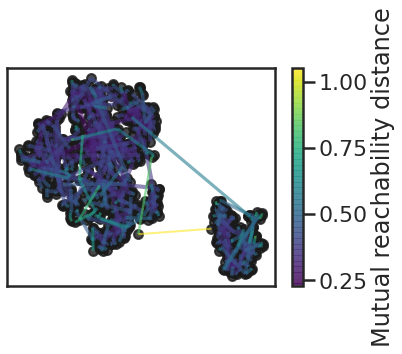

In [ ]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

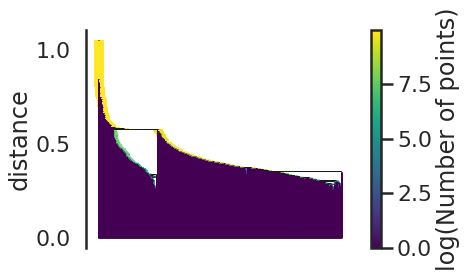

In [ ]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

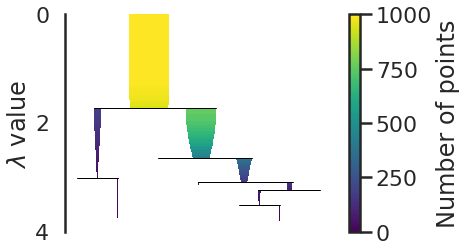

In [ ]:
clusterer.condensed_tree_.plot()

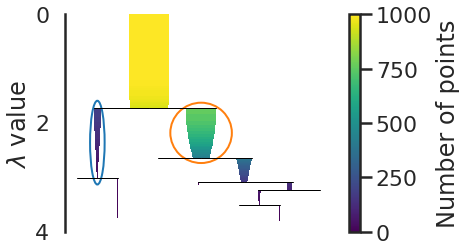

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

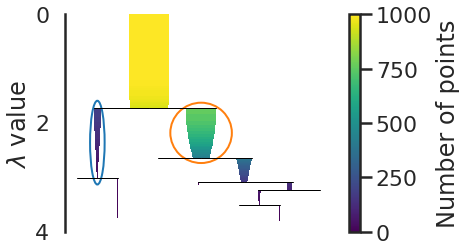

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

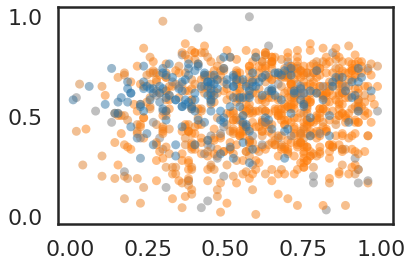

In [ ]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(num_df_1['Energy'], num_df_1['Popularity'], c=cluster_colors, **plot_kwds)

# **DBSCAN**

In [ ]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import interact
import ipywidgets as widgets


def fit_and_plot_clustering(df, clusterer,x,y, print_number=False):
    df = df.copy()
    df['clusterid'] = clusterer.fit_predict(df[[x, y]])
    n_clusters = df['clusterid'].max() + 1
    n_outliers = np.sum(df['clusterid'] == -1)
    if print_number:
        print(f'number of clusters: {n_clusters}\nnumber of outliers: {n_outliers}')
    cmap = plt.get_cmap('Set1', n_clusters+1)
    ax = df.plot(kind='scatter', x=x, y=y, c='clusterid', cmap=cmap, s=80, colorbar=False)
    ax.grid()
    
    return df
    
style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scale_columns = ["Energy","Popularity"]
df[scale_columns] = std_scaler.fit_transform(df[scale_columns])

df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,2,47,157,-1.340009,53,-14,11,68,201,94,3,0.799653
1,2,Black Night,Deep Purple,5,43,135,0.872304,50,-11,17,81,207,17,7,-1.430623
2,3,Clint Eastwood,Gorillaz,8,44,168,0.420812,66,-9,7,52,341,2,17,0.660261
3,4,The Pretender,Foo Fighters,9,50,173,1.639841,43,-4,3,37,269,0,4,1.148133
4,5,Waitin' On A Sunny Day,Bruce Springsteen,61,45,106,1.007752,58,-5,10,87,256,1,3,-0.036701


In [ ]:
music = df.select_dtypes('number')
std_scaler = StandardScaler()
#cities_numeric = cities_numeric[['Cappuccino','Avg Rent','Avg Disposable Income','Gasoline','population']]
df2 = std_scaler.fit_transform(music)
df2

array([[-1.73118239, -1.13489881,  0.6831735 , ...,  2.24590849,
        -0.45335805,  0.79965286],
       [-1.72944513, -1.0678049 ,  0.43489392, ..., -0.4088327 ,
         0.45563738, -1.43062294],
       [-1.72770787, -1.00071099,  0.49696382, ..., -0.92599008,
         2.72812596,  0.66026062],
       ...,
       [ 1.72770787, -0.41923041, -2.10997172, ...,  1.55636532,
         0.45563738,  1.00874122],
       [ 1.72944513, -0.55341823, -2.10997172, ...,  0.86682216,
        -0.2261092 ,  0.38147615],
       [ 1.73118239, -1.13489881, -2.10997172, ...,  1.55636532,
        -0.45335805, -0.24578892]])

In [ ]:
from sklearn.cluster import DBSCAN




def plot_dbscan(eps = 0.5, min_samples = 10):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    lable_df = fit_and_plot_clustering(df, dbscan,"Energy","Popularity",  print_number=True)
    

i = interact(plot_dbscan 
            , eps=widgets.SelectionSlider(options=np.arange(0.2,1.4,0.1), description='Epsilon', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , min_samples=widgets.SelectionSlider(options=range(1, 21), description='Minimum of samples', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
        );

interactive(children=(SelectionSlider(continuous_update=False, description='Epsilon', layout=Layout(width='400…

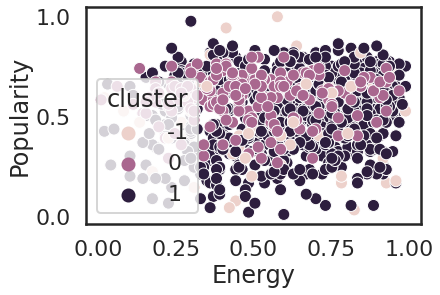

In [ ]:
sns.scatterplot(data=num_df_1, x=num_df_1["Energy"], y=num_df_1["Popularity"], hue=num_df_1['cluster'])

In [ ]:
x = df.iloc[:, [6, 14]].values

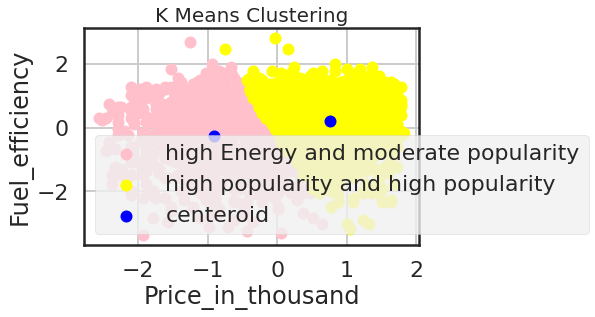

In [ ]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'high Energy and moderate popularity')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'high popularity and high popularity')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 100, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Price_in_thousand')
plt.ylabel('Fuel_efficiency')
plt.legend()
plt.grid()
plt.show()